Applied Data Science Capstone


This is the start of my project.

In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Introduction:

Car wrecks are a major problem, and there are several reasons for this. First off, safety is a concern. Car wrecks cost a lot of money too. Wrecks can also have effects on people that are not directly involved in the wreck itself. Traffic jams can waste time for a lot of people. If car wrecks can be predicted, they might be able to be prevented. Cyclist involved accidents are also a major concern; they are typically on the road with cars. There are large amounts of data involving car wrecks. Data Science can be used to predict when a wreck will occur. This information will be valuable to Departments of Transportation and all people that travel by road, not just drivers. A person who commutes by bus can appreciate the information. The models can help save their lives as well as help them to avoid traffic. Also, this information can be given to the Department of Transportation to help improve the actual roads and transportation system. If a specific location has a lot of vehicle/bicycle wrecks, the Department of Transportation might want to make changes in the area. They would be able to dive into the results from the models to determine the best way to prevent wrecks and injury.


Data Explanation:

The collision data used is from Seattle, Washington. The data goes back to 2004 and goes to the present. There are many attributes in this data set: location, severity, collision type, number of cyclists/pedestrians, vehicles involved, injuries, fatalities, date, causes, weather, road conditions, and others. Using this data, models can be developed to help determine when a car wreck might occur. As the data is reviewed, it will determined which model will work best. Each incident in the data set, has the corresponding information filled out. Not all of the information is filled out every time, so the data will need to be processed to make sure the model turns out correctly. For example, one incident involving two vehicles occurred at an intersection. No pedestrians or cyclists were involved. The driver was not under the influence of drugs or alcohol. The road was wet, and the weather was listed as "Overcast". Given this sort of information for many car wrecks, a model can be developed to help predict a wreck given specific circumstances, weather, road conditions, time of day, etc.


In [5]:
#Import data

!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-04 20:06:36--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  44.0MB/s    in 1.6s    

2020-10-04 20:06:38 (44.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [6]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df.shape

(194673, 38)

In [8]:
df.describe

<bound method NDFrame.describe of         SEVERITYCODE           X  ...  CROSSWALKKEY  HITPARKEDCAR
0                  2 -122.323148  ...             0             N
1                  1 -122.347294  ...             0             N
2                  1 -122.334540  ...             0             N
3                  1 -122.334803  ...             0             N
4                  2 -122.306426  ...             0             N
...              ...         ...  ...           ...           ...
194668             2 -122.290826  ...             0             N
194669             1 -122.344526  ...             0             N
194670             2 -122.306689  ...             0             N
194671             2 -122.355317  ...             0             N
194672             1 -122.289360  ...             0             N

[194673 rows x 38 columns]>

In [9]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [11]:
#standardize date format

df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [12]:
#sort by Severity Code, new df: df_SC

df_SC=df.sort_values(by='SEVERITYCODE.1', ascending=False)
df_SC.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
97614,2,-122.340881,47.571751,107228,122450,122450,3330884,Matched,Block,NaN,ALASKAN WY VI SB WSB WB OFF RP BETWEEN ALASKAN...,NaN,NaN,2,Injury Collision,Other,1,0,0,1,2011-08-30 00:00:00+00:00,2011-08-30 09:28:00,Mid-Block (not related to intersection),26,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,N,Clear,Dry,Daylight,NaN,11242021.0,NaN,50,Fixed object,0,0,N
97632,2,-122.337544,47.606122,107247,122284,122284,3373509,Matched,Intersection,29611.0,1ST AVE AND SENECA ST,NaN,NaN,2,Injury Collision,Angles,3,0,0,2,2011-07-31 00:00:00+00:00,2011-07-31 08:19:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,11212009.0,NaN,10,Entering at angle,0,0,N
97631,2,-122.354995,47.538667,107246,120590,120590,3553156,Matched,Block,NaN,16TH AVE SW BETWEEN SW MYRTLE ST AND SW ORCHAR...,NaN,NaN,2,Injury Collision,Rear Ended,4,0,0,2,2011-10-20 00:00:00+00:00,2011-10-20 20:29:00,Driveway Junction,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,11293025.0,NaN,13,From same direction - both going straight - bo...,0,0,N
97629,2,-122.272739,47.529106,107244,121904,121904,3372695,Matched,Intersection,35222.0,48TH AVE S AND S ROSE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2011-05-18 00:00:00+00:00,2011-05-18 19:58:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,11138010.0,NaN,10,Entering at angle,0,0,N


In [13]:
#Severity Code Counts

df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

No fatalities in data, only property damage and injuries. Will focus on collisions with injuries.

In [14]:
#Address Type Counts

df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

Roughly half as many collisions at intersections compared to blocks. This surprises me.

In [15]:
df.groupby(['ADDRTYPE'])['SEVERITYCODE.1'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE.1
Alley         1                 0.890812
              2                 0.109188
Block         1                 0.762885
              2                 0.237115
Intersection  1                 0.572476
              2                 0.427524
Name: SEVERITYCODE.1, dtype: float64

Low injury percentage in alleys - can probably remove "Alley" from df.
Higher injury percentage in blocks.
Highest injury percentage at intersections.
The actual number of collisions with injuries for "Intersection" and "Block" collisions is roughly the same - 27,800 - 30,100 (rough numbers).

In [16]:
#Cyclist Involved Counts

df['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

Most collisions do not involve cyclists. Check for patterns, recommend cyclists avoid certain areas given conditions.

In [17]:
#Pedestrian Involved Counts

df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

Most collisions do not involve pedestrians. Check for patterns, recommend pedestrians avoid certain areas given conditions.

In [18]:
#!pip install earthengine-api

import folium
!pip install folium
from folium import plugins



In [19]:
# Seattle latitude and longitude values
latitude = 47.6062
longitude = -122.3321

In [20]:
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of Seattle
seattle_map

In [21]:
df_no = df
df_no.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [22]:
df_no = df_no[df_no['X'].notna()]
df_no.isna().sum()

SEVERITYCODE           0
X                      0
Y                      0
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE               0
INTKEY            124591
LOCATION               0
EXCEPTRSNCODE     107639
EXCEPTRSNDESC     185653
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4757
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        4193
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    160163
UNDERINFL           4737
WEATHER             4925
ROADCOND            4858
LIGHTCOND           5012
PEDROWNOTGRNT     184694
SDOTCOLNUM         77621
SPEEDING          180619
ST_COLCODE            18
ST_COLDESC          4757
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [23]:
#make cyclist df

df_cyc = df_no.loc[(df_no['PEDCYLCOUNT'] > 0)]

df_cyc.head()
df_cyc.shape

(5447, 38)

In [24]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the collisions and add each to the incidents feature group
for lat, lng, in zip(df_cyc.Y, df_cyc.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_cyc.Y)
longitudes = list(df_cyc.X)
labels = list(df_cyc.SEVERITYDESC)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(seattle_map)    
    
# add incidents to map
seattle_map.add_child(incidents)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
#make pedestrian df

df_ped = df_no.loc[(df_no['PEDCOUNT'] > 0)]

df_ped.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
71,2,-122.341775,47.615265,83,41900,41900,2024135,Matched,Intersection,29534.0,5TH AVE AND BLANCHARD ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,2005-08-24 00:00:00+00:00,2005-08-24 10:35:00,At Intersection (intersection related),24,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Clear,Dry,Daylight,NaN,5236010.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
84,2,-122.302233,47.599281,96,112500,112500,3199463,Matched,Intersection,30757.0,23RD AVE S AND S JACKSON ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,2010-03-10 00:00:00+00:00,2010-03-10 11:58:00,At Intersection (intersection related),24,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,10069006.0,NaN,1,Vehicle turning right hits pedestrian,0,521466,N
92,1,-122.320762,47.612963,105,330954,332454,EA30502,Matched,Intersection,29757.0,BROADWAY AND E UNION ST,,NaN,1,Property Damage Only Collision,Pedestrian,3,1,0,1,2020-04-22 00:00:00+00:00,2020-04-22 21:14:00,At Intersection (intersection related),24,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Overcast,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
104,2,-122.326804,47.616708,120,96600,96600,3207411,Matched,Block,NaN,BELLEVUE AVE BETWEEN E OLIVE ST AND E OLIVE WAY,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,2009-09-30 00:00:00+00:00,2009-09-30 18:41:00,Mid-Block (but intersection related),24,MOTOR VEHCILE STRUCK PEDESTRIAN,Y,0,Clear,Dry,Dusk,NaN,9273020.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
114,2,-122.315442,47.661285,130,320909,322409,E925052,Matched,Intersection,27064.0,12TH AVE NE AND NE 45TH ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,2019-04-25 00:00:00+00:00,2019-04-25 11:52:00,At Intersection (intersection related),24,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,1,Vehicle turning right hits pedestrian,0,0,N


In [26]:
df['WEATHER'].value_counts()




Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [27]:


df['ROADCOND'].value_counts()


Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [28]:


df['LIGHTCOND'].value_counts()


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [29]:
#REMOVE NaN
df_cyce=df_cyc.dropna(subset=['ROADCOND', 'LIGHTCOND', 'WEATHER'])
df_cyce

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
25,2,-122.312857,47.599218,34,320932,322432,E926429,Matched,Block,NaN,S JACKSON ST BETWEEN 14TH AVE S AND 16TH AVE S,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019-04-25 00:00:00+00:00,2019-04-25 09:40:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",Y,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
52,2,-122.328913,47.613466,62,1290,1290,3581633,Matched,Intersection,29878.0,BOREN AVE AND PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2013-03-29 00:00:00+00:00,2013-03-29 11:53:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Unknown,Y,NaN,NaN,45,Vehicle - Pedalcyclist,25242,0,N
79,1,-122.312464,47.652976,91,1099,1099,3503283,Matched,Intersection,27149.0,15TH AVE NE AND NE PACIFIC ST,,NaN,1,Property Damage Only Collision,Cycles,2,0,1,1,2013-03-28 00:00:00+00:00,2013-03-28 15:30:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,0,520838,N
90,2,-122.337054,47.695963,103,22000,22000,1079891,Matched,Block,NaN,N 92ND ST BETWEEN DENSMORE AVE N AND WALLINGFO...,NaN,NaN,2,Injury Collision,Other,1,0,1,0,2004-10-11 00:00:00+00:00,2004-10-11 16:00:00,Mid-Block (but intersection related),69,PEDALCYCLIST OVERTURNED IN ROAD,NaN,0,Clear,Dry,Daylight,NaN,4285019.0,NaN,52,Vehicle overturned,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194579,2,-122.333728,47.598291,219437,308881,310161,E874935,Matched,Block,NaN,S KING ST BETWEEN 1ST AVE S AND OCCIDENTAL W A...,,NaN,2,Injury Collision,Cycles,2,0,1,1,2018-12-11 00:00:00+00:00,2018-12-11 09:54:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
194585,1,-122.377090,47.586356,219443,307465,308745,3745698,Matched,Block,NaN,HARBOR AVE SW BETWEEN FAIRMOUNT AVE SW AND SW ...,,NaN,1,Property Damage Only Collision,Cycles,2,0,1,1,2018-10-15 00:00:00+00:00,2018-10-15 11:58:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,6,Pedalcyclist Strikes Moving Vehicle,0,0,N
194594,2,-122.338693,47.604652,219455,312317,313737,3750376,Matched,Intersection,29625.0,ALASKAN E RDWY WAY AND SPRING ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019-01-25 00:00:00+00:00,2019-01-25 15:54:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
194640,2,-122.322445,47.599186,219507,307337,308617,3812132,Matched,Intersection,30425.0,8TH AVE S AND S JACKSON ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2018-11-28 00:00:00+00:00,2018-11-28 17:14:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Overcast,Wet,Dark - Street Lights Off,NaN,NaN,NaN,6,Pedalcyclist Strikes Moving Vehicle,0,0,N


In [30]:
# let's start again with a clean copy of the map of Seattle
cyc_map03 = folium.Map(location = [latitude, longitude], zoom_start = 11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(cyc_map03)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_cyce.Y, df_cyce.X, df_cyce.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
cyc_map03

Output hidden; open in https://colab.research.google.com to view.

In [31]:
df_cyc['WEATHER'].value_counts()




Clear                       3928
Overcast                     791
Raining                      594
Unknown                      113
Other                          7
Fog/Smog/Smoke                 5
Snowing                        2
Blowing Sand/Dirt              1
Sleet/Hail/Freezing Rain       1
Name: WEATHER, dtype: int64

In [32]:


df_cyc['ROADCOND'].value_counts()


Dry               4369
Wet                930
Unknown            122
Ice                 10
Snow/Slush           4
Standing Water       3
Other                2
Sand/Mud/Dirt        2
Name: ROADCOND, dtype: int64

In [33]:


df_cyc['LIGHTCOND'].value_counts()


Daylight                    4057
Dark - Street Lights On      910
Dusk                         210
Dawn                         107
Unknown                       93
Dark - No Street Lights       33
Dark - Street Lights Off      28
Other                          2
Dark - Unknown Lighting        1
Name: LIGHTCOND, dtype: int64

In [34]:
import seaborn as sns

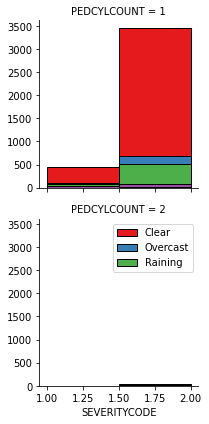

In [35]:


bins = np.linspace(df_cyc.SEVERITYCODE.min(), df_cyc.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(df_cyc, col="PEDCYLCOUNT", hue="WEATHER", palette="Set1", col_wrap=1)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

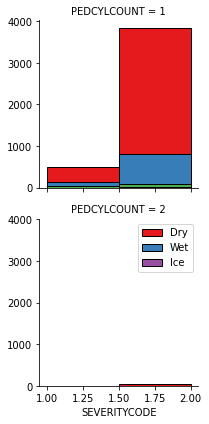

In [36]:


bins = np.linspace(df_cyc.SEVERITYCODE.min(), df_cyc.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(df_cyc, col="PEDCYLCOUNT", hue="ROADCOND", palette="Set1", col_wrap=1)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

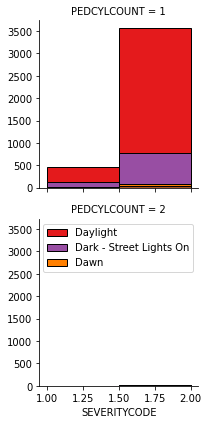

In [37]:


bins = np.linspace(df_cyc.SEVERITYCODE.min(), df_cyc.SEVERITYCODE.max(), 3)
g = sns.FacetGrid(df_cyc, col="PEDCYLCOUNT", hue="LIGHTCOND", palette="Set1", col_wrap=1)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [38]:
df_cyce

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
25,2,-122.312857,47.599218,34,320932,322432,E926429,Matched,Block,NaN,S JACKSON ST BETWEEN 14TH AVE S AND 16TH AVE S,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019-04-25 00:00:00+00:00,2019-04-25 09:40:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",Y,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
52,2,-122.328913,47.613466,62,1290,1290,3581633,Matched,Intersection,29878.0,BOREN AVE AND PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2013-03-29 00:00:00+00:00,2013-03-29 11:53:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Unknown,Y,NaN,NaN,45,Vehicle - Pedalcyclist,25242,0,N
79,1,-122.312464,47.652976,91,1099,1099,3503283,Matched,Intersection,27149.0,15TH AVE NE AND NE PACIFIC ST,,NaN,1,Property Damage Only Collision,Cycles,2,0,1,1,2013-03-28 00:00:00+00:00,2013-03-28 15:30:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,0,520838,N
90,2,-122.337054,47.695963,103,22000,22000,1079891,Matched,Block,NaN,N 92ND ST BETWEEN DENSMORE AVE N AND WALLINGFO...,NaN,NaN,2,Injury Collision,Other,1,0,1,0,2004-10-11 00:00:00+00:00,2004-10-11 16:00:00,Mid-Block (but intersection related),69,PEDALCYCLIST OVERTURNED IN ROAD,NaN,0,Clear,Dry,Daylight,NaN,4285019.0,NaN,52,Vehicle overturned,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194579,2,-122.333728,47.598291,219437,308881,310161,E874935,Matched,Block,NaN,S KING ST BETWEEN 1ST AVE S AND OCCIDENTAL W A...,,NaN,2,Injury Collision,Cycles,2,0,1,1,2018-12-11 00:00:00+00:00,2018-12-11 09:54:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
194585,1,-122.377090,47.586356,219443,307465,308745,3745698,Matched,Block,NaN,HARBOR AVE SW BETWEEN FAIRMOUNT AVE SW AND SW ...,,NaN,1,Property Damage Only Collision,Cycles,2,0,1,1,2018-10-15 00:00:00+00:00,2018-10-15 11:58:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,6,Pedalcyclist Strikes Moving Vehicle,0,0,N
194594,2,-122.338693,47.604652,219455,312317,313737,3750376,Matched,Intersection,29625.0,ALASKAN E RDWY WAY AND SPRING ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019-01-25 00:00:00+00:00,2019-01-25 15:54:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
194640,2,-122.322445,47.599186,219507,307337,308617,3812132,Matched,Intersection,30425.0,8TH AVE S AND S JACKSON ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2018-11-28 00:00:00+00:00,2018-11-28 17:14:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Overcast,Wet,Dark - Street Lights Off,NaN,NaN,NaN,6,Pedalcyclist Strikes Moving Vehicle,0,0,N


In [39]:
df_cyce['WEATHER'] = df_cyce['WEATHER'].apply(str)
df_cyce['ROADCOND'] = df_cyce['ROADCOND'].apply(str)
df_cyce['LIGHTCOND'] = df_cyce['LIGHTCOND'].apply(str)

df_cyce['WEATHER'].replace(to_replace=['Clear','Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], value=[0,6,1,10,8,9,2,7,3,4,5],inplace=True)
df_cyce['ROADCOND'].replace(to_replace=['Dry','Wet', 'Standing Water', 'Ice', 'Snow/Slush', 'Sand/Mud/Dirt', 'Oil', 'Other', 'Unknown', 'NaN'], value=[0,1,1,2,2,3,4,5,6,6],inplace=True)
df_cyce['LIGHTCOND'].replace(to_replace=['Dusk','Daylight', 'Dawn', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'], value=[0,1,2,3,3,3,3,4,5],inplace=True)
#df['UNDERINFL'].replace(to_replace=['N','Y', '0', '1'], value=[0,1,2,3],inplace=True)

df_cyce.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,0,0,1,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
25,2,-122.312857,47.599218,34,320932,322432,E926429,Matched,Block,NaN,S JACKSON ST BETWEEN 14TH AVE S AND 16TH AVE S,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019-04-25 00:00:00+00:00,2019-04-25 09:40:00,Mid-Block (not related to intersection),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",Y,N,0,0,1,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
52,2,-122.328913,47.613466,62,1290,1290,3581633,Matched,Intersection,29878.0,BOREN AVE AND PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2013-03-29 00:00:00+00:00,2013-03-29 11:53:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,0,0,5,Y,NaN,NaN,45,Vehicle - Pedalcyclist,25242,0,N
79,1,-122.312464,47.652976,91,1099,1099,3503283,Matched,Intersection,27149.0,15TH AVE NE AND NE PACIFIC ST,,NaN,1,Property Damage Only Collision,Cycles,2,0,1,1,2013-03-28 00:00:00+00:00,2013-03-28 15:30:00,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,0,0,1,Y,NaN,NaN,45,Vehicle - Pedalcyclist,0,520838,N
90,2,-122.337054,47.695963,103,22000,22000,1079891,Matched,Block,NaN,N 92ND ST BETWEEN DENSMORE AVE N AND WALLINGFO...,NaN,NaN,2,Injury Collision,Other,1,0,1,0,2004-10-11 00:00:00+00:00,2004-10-11 16:00:00,Mid-Block (but intersection related),69,PEDALCYCLIST OVERTURNED IN ROAD,NaN,0,0,0,1,NaN,4285019.0,NaN,52,Vehicle overturned,0,0,N


In [40]:
df_cyce.groupby(['ADDRTYPE'])['SEVERITYCODE.1'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE.1
Block         2                 0.860787
              1                 0.139213
Intersection  2                 0.887928
              1                 0.112072
Name: SEVERITYCODE.1, dtype: float64

In [41]:
df_cyce.shape

(5436, 38)

In [42]:
Feature = df_cyce[['LIGHTCOND', 'WEATHER', 'ROADCOND']]

Feature.head()

,LIGHTCOND,WEATHER,ROADCOND
7,1,0,0
25,1,0,0
52,5,0,0
79,1,0,0
90,1,0,0


In [43]:
df_cyce['WEATHER'].value_counts()

0     3923
1      791
6      594
10     112
9        7
2        5
8        2
7        1
3        1
Name: WEATHER, dtype: int64

In [44]:
X = Feature

In [45]:
y = df_cyce['SEVERITYCODE.1'].values
y[0:5]

array([2, 2, 2, 1, 2])

In [46]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331895, -0.44835265, -0.33073927],
       [-0.43331895, -0.44835265, -0.33073927],
       [ 3.82428937, -0.44835265, -0.33073927],
       [-0.43331895, -0.44835265, -0.33073927],
       [-0.43331895, -0.44835265, -0.33073927]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4348, 3) (4348,)
Test set: (1088, 3) (1088,)


Train set Accuracy:  0.8739650413983441
Test set Accuracy:  0.8823529411764706


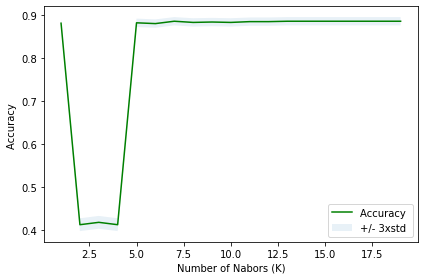

The best accuracy was with 0.8860294117647058 with k= 7
Avg F1-score: 0.8325
Jaccard score: 0.8860


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [48]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier

k = 5
#Train Model and Predict  

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

KNN_F1 = f1_score(y_test, yhat, average='weighted')
KNN_Jaccard = jaccard_similarity_score(y_test, yhat)

print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))



Make final KNN model with appropriate k value

In [49]:
k = 7

kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_test,y_test)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [50]:
pd.isnull(np.array([np.nan, 0], dtype=object))

array([ True, False])

In [51]:
df_cycstr = df_cyce[['LIGHTCOND', 'WEATHER', 'ROADCOND', 'SEVERITYCODE.1']]
df_cycstr = df_cycstr.applymap(str)
df_cycstr.head()

,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE.1
7,1,0,0,2
25,1,0,0,2
52,5,0,0,2
79,1,0,0,1
90,1,0,0,2


In [52]:
Feature2 = df_cyce[['LIGHTCOND', 'WEATHER', 'ROADCOND']]

Feature2.head()

,LIGHTCOND,WEATHER,ROADCOND
7,1,0,0
25,1,0,0
52,5,0,0
79,1,0,0
90,1,0,0


In [53]:
Xstr = Feature2

In [54]:
ystr = df_cycstr['SEVERITYCODE.1'].values
y[0:5]

array([2, 2, 2, 1, 2])

In [55]:
Xstr= preprocessing.StandardScaler().fit(X).transform(X)
Xstr[0:5]

array([[-0.43331895, -0.44835265, -0.33073927],
       [-0.43331895, -0.44835265, -0.33073927],
       [ 3.82428937, -0.44835265, -0.33073927],
       [-0.43331895, -0.44835265, -0.33073927],
       [-0.43331895, -0.44835265, -0.33073927]])

In [56]:
X_trainstr, X_teststr, y_trainstr, y_teststr = train_test_split( Xstr, ystr, test_size=0.2, random_state=4)
print ('Train set:', X_trainstr.shape,  y_trainstr.shape)
print ('Test set:', X_teststr.shape,  y_teststr.shape)

Train set: (4348, 3) (4348,)
Test set: (1088, 3) (1088,)


In [57]:
from sklearn.tree import DecisionTreeClassifier

cyctree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

cyctree.fit(X_train,y_train)

cyctree 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
predtree = cyctree.predict(X_test)

#print (cyctree [0:5])
print (y_test [0:5])

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))


[2 2 2 2 1]
DecisionTrees's Accuracy:  0.8851102941176471


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


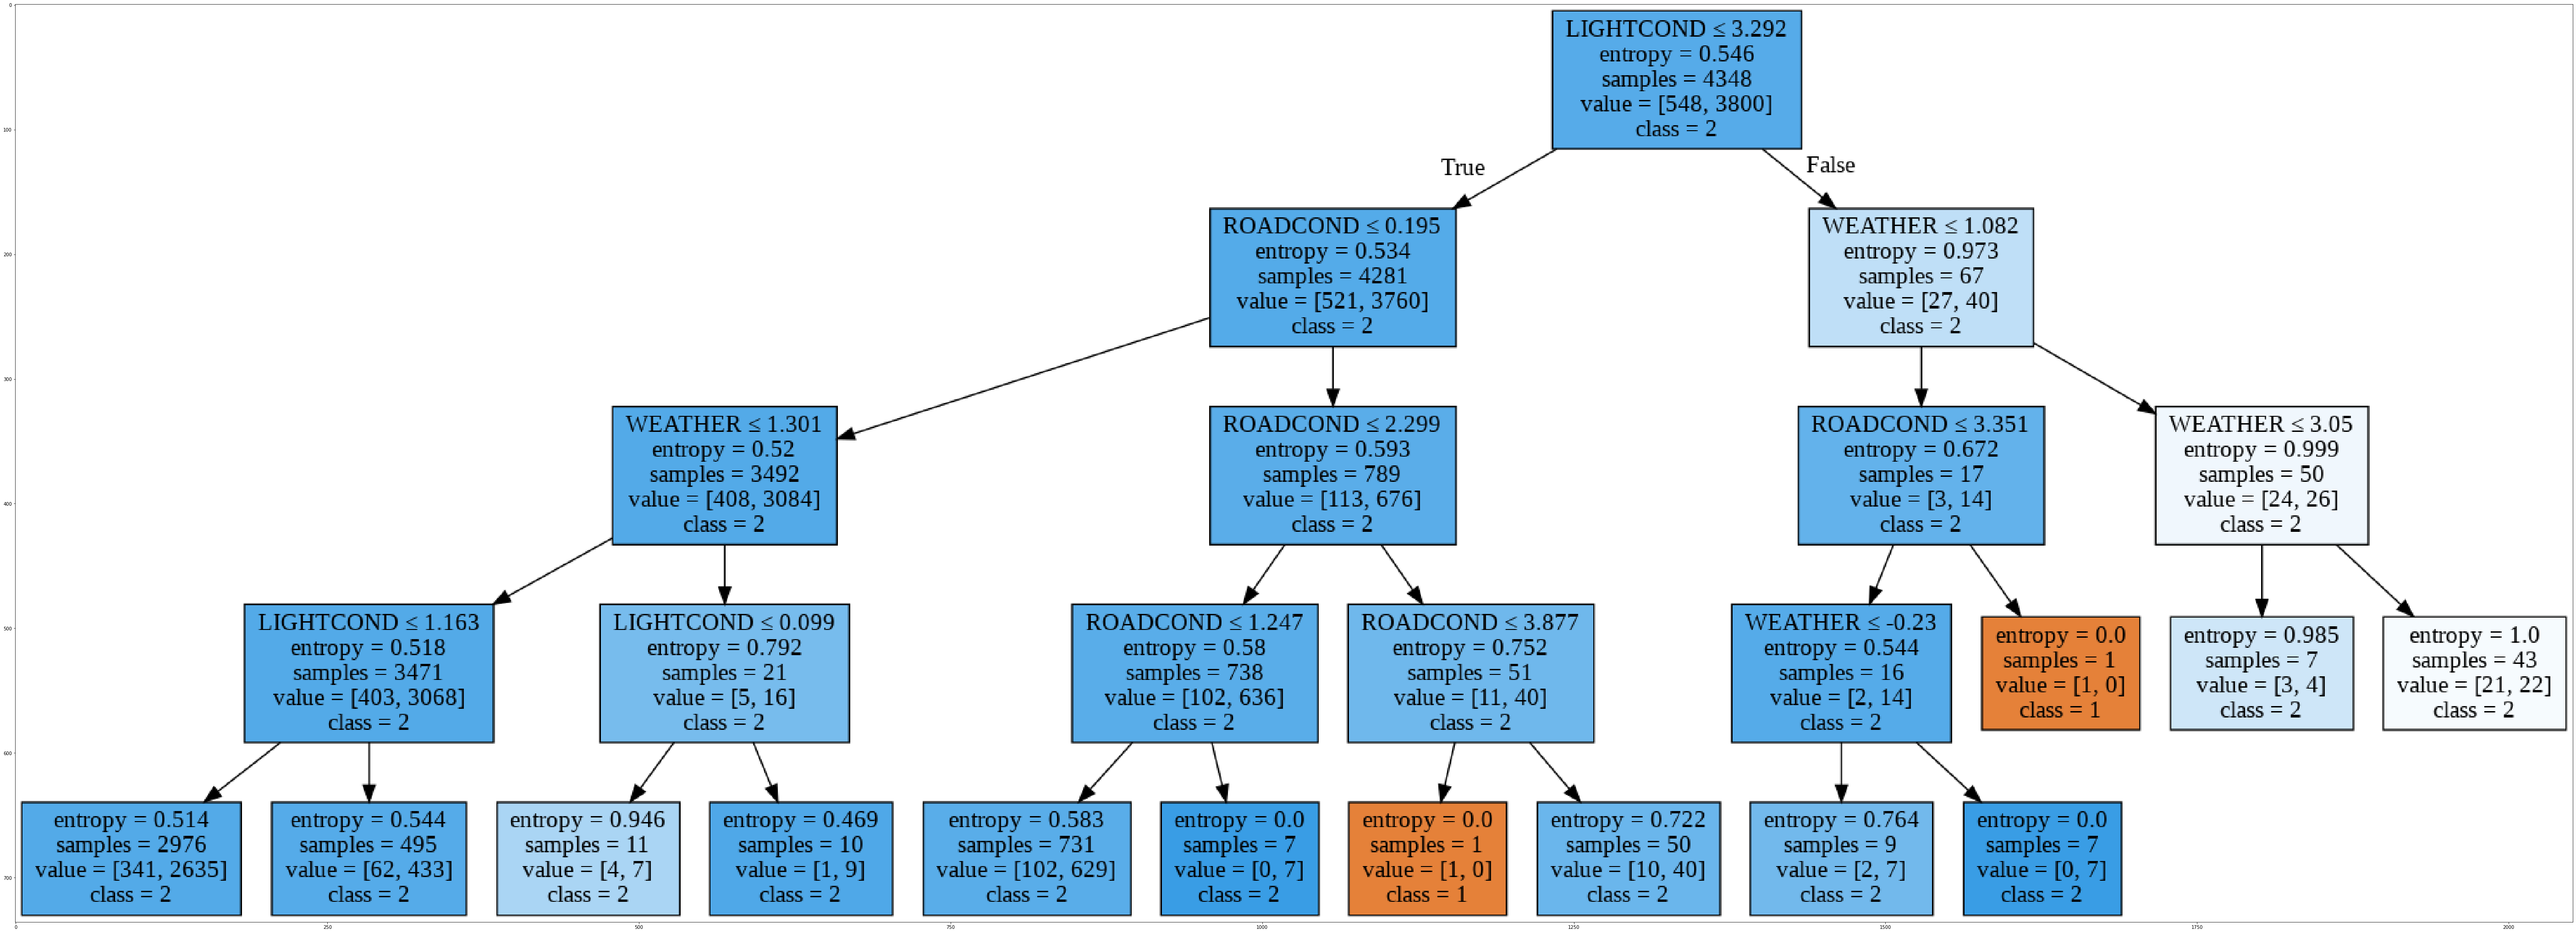

In [59]:


!pip install pydotplus

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "cyctree.png"
featureNames = df_cycstr.columns[0:3]
targetNames = df_cycstr["SEVERITYCODE.1"].unique().tolist()
out=tree.export_graphviz(cyctree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainstr), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [60]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train) 




SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
yhat3 = SVM.predict(X_test)
yhat3 [0:5]

array([2, 2, 2, 2, 2])

In [62]:


SVM_Jaccard=jaccard_similarity_score(y_test, yhat3)
SVM_F1=f1_score(y_test, yhat3, average='weighted')

print("SVM Jaccard Index: %.2f" % jaccard_similarity_score(y_test, yhat3))
print("SVM F1 Score: %.2f" % f1_score(y_test, yhat3, average='weighted'))

SVM Jaccard Index: 0.89
SVM F1 Score: 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [63]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
yhat4 = LR.predict(X_test)
yhat4

array([2, 2, 2, ..., 2, 2, 2])

In [65]:
from sklearn.metrics import log_loss

yhat4 = LR.predict(X_test)
yhat4_prob = LR.predict_proba(X_test)

LR_Jaccard=jaccard_similarity_score(y_test, yhat4)
LR_F1=f1_score(y_test, yhat4, average='weighted')
LR_Log_Loss=log_loss(y_test, yhat4_prob)

print("LR Jaccard Index: %.2f" % jaccard_similarity_score(y_test, yhat4))
print("LR F1 Score: %.2f" % f1_score(y_test, yhat4, average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test, yhat4_prob))

LR Jaccard Index: 0.89
LR F1 Score: 0.83
LR LogLoss: 0.35


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
